In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def KNNClassify(labelData,predData,k):  #数据集包含分类属性
#labelData 是已经标记分类的数据集
#predData 未分类的待预测数据集
    labShape = labelData.shape
    for i in range(predData.shape[0]): #以predData的每行数据进行遍历
        iData = predData[i]
        iDset = np.tile(iData,(labShape[0],1))   #将iData重复，扩展成与labelData同形的矩阵
        #这里用欧拉距离sqrt((x1-x2)^2+(y1-y2)^2)
        diff = iDset[...,:-1] - labelData[...,:-1]
        diff = diff**2
        distance = np.sum(diff,axis=1)
        distance = distance ** 0.5  #开根号
        sortedIND = np.argsort(distance)   #排序，以序号返回。
        classCount = { }
        for j in range(k):  #计算距离最近的前k个标记数据的类别
            voteLabel = labelData[sortedIND[j],-1]
            classCount[voteLabel] = classCount.get(voteLabel,0)+1

        maxcls = max(classCount,key=classCount.get)   #类别最多的，返回键名（类别名）
        predData[i][...,-1] =  maxcls

    return predData

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#模拟生成分类数据
#目标是产生二维坐标中的几堆数据集，每堆为一个类
#函数逻辑：
#将x轴分段，每个段设一个中心的，所有的中心点用cores存储。
#设置每个数据中心点core的类别，由中心点在一定范围内随机产生数据，并将这些数据设为和core一样的类别
#所以每类的数据会简单的被X轴的每段大致分开

def makeKNNData(colnum,clsnum,nums,cores = []):
#colnum单个数据拥有特征数量（包括数据的分类）；
# clsnum表示共有多少种分类；
# nums是一个元组，表示每个类别希望产生多少数据样本，如colnum为5，nums为[56, 69, 60, 92, 95]；
#cores非必要参数，手动给出只是用于测试，cores提供每类的中心点，以中心点为依据产生该类数据。

    dataSet = np.zeros((sum(nums),colnum))   #初始化数据集，用于存放随后生成的所有数据
    n=0   #记录生成数据的下标
    step = 20/clsnum      #假定X坐标轴只显示0~20的范围，step为X轴分段后的段长
    for j in range(clsnum):     #循环生成各个类数据
        try:
            core = cores[j]      #如果cores没有给出则，则出错，跳至except执行
        except IndexError :
            core = np.random.rand(1,3)      #中心点为array([[x1,x2,c]])，c用于表示类别，这里产生的是1*3的二维数组
            core[0][0] =j*step + core[0][0]*step  #将x1限制在各段中
            core[0][1] *=15       #将x2即y轴限制在0~15范围内
            core[0][2] = j    #设置类别
            cores.append(core)
        for i in range(nums[j]):   #按nums中指定了每类数据的数量，用循环生成。
            point= core[0][:2] + np.random.rand(1,2)*step -step/2   #产生点point（x,y)，x以中心点在（core_x - step/2, core_x + step/2)范围随机波动，y同理。
            row = np.column_stack((point,core[0][2]))   #加上类别成为一个数据
            dataSet[n] = row
            n +=1
            i +=1

        j +=1

    #print("print cores:",cores)
    return dataSet

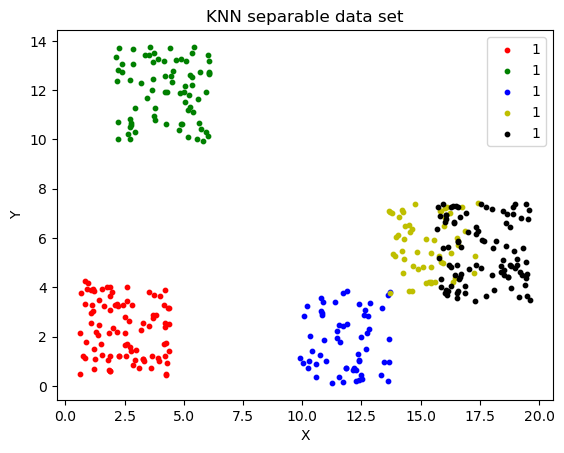

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#绘图展示数据，每类数据点以不同的颜色显示
def showFigure(dataSet,clsnum):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)   #界面只需显示一个视图
    ax.set_title('KNN separable data set')  #视图名称，这里简单统一定这个名称吧
    plt.xlabel('X')    #坐标轴名称
    plt.ylabel('Y')

    colors = ['r','g','b','y','k']   #定义显示的颜色b为blue，k为black
    for i in range(clsnum):
        idx = np.where(dataSet[:,2] == i)  #查询每类的索引号
        ax.scatter(dataSet[idx,0], dataSet[idx,1], marker='o', color=colors[i%5], label=1, s=10)  #在视图中的显示方式

    plt.legend(loc = 'upper right')   #图例显示位置
    plt.show()


#测试一下
#需要结合模拟生成数据的函数
classnum = 5
nums = np.random.randint(50,100,classnum)   #示例 array([56, 69, 60, 92, 95])，每个数字在50~100范围内
dataSet = makeKNNData(3,classnum,nums)
showFigure(dataSet,classnum)
